# Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv # only read_csv method is going to be used
from scipy import optimize as opt

# Model Preparation

## Plot data

In [31]:
def plot_data(X, Y, m):
    
    positive_indices = Y>0
#     print('+ indices: \n' + str(positive_indices))
    positive_indices = positive_indices.reshape(m, )
    positive_example_features = X[positive_indices]
#     print('+ features: ' + str(positive_example_features))

    negative_indices = Y == 0
#     print(' - indices:\n' + str(negative_indices))
    negative_indices = negative_indices.reshape(m, )
    negative_example_features = X[negative_indices]
#     print('-ve features:\n' + str(negative_example_features))
    
    plt.scatter(positive_example_features[:, 0], positive_example_features[:, 1], label = 'Positive examples', marker = 'o', color = 'green')
#     print(positive_example_features[:, 0])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Features from the given dataset')
    plt.scatter(negative_example_features[:, 0], negative_example_features[:, 1], label = 'Negative examples', marker = 'x', color = 'red')
#     print(negative_example_features[:, 0])

    plt.legend(bbox_to_anchor = (1,1))
#     plt.show()
      

## Sigmoid function

In [32]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Cost computation sub-routine

In [33]:
def compute_cost(theta, X, Y, m):

    htheta_vector = sigmoid(np.dot(X, theta))
    print(htheta_vector)

    J = (-1/m) * np.sum((Y * np.log(htheta_vector)) + ((1-Y) * np.log(1-htheta_vector)))
    
    return J
    

## Gradient computation sub-routine

In [34]:
def compute_gradient(theta, X, Y, m):
    
    htheta_vector = sigmoid(np.dot(X, theta))
    error_vector = htheta_vector - Y
    gradient_vector = (1/m)*(np.dot(X.T, error_vector))
    
    return gradient_vector.flatten()

## Plot decision boundary

In [35]:
def plot_decision_boundary(theta, X):
    #to be done. for now, do nothing ie, pass
    pass
    

## Main function

In [36]:
def main():
    df = read_csv('data1.csv', header = None)
    data = df.values #numpy array
    
    X = data[:,0:2] # extracting features
#     print('features:\n' + str(X))
    Y = data[:,-1] # extracting labels
#     print('labels:\n' + str(Y))
    
    m = (X.shape)[0] # number of training examples
    n = (X.shape)[1] # number of features
    
    ones = np.ones(shape = (m,1))
    X_with_bias = np.concatenate([ones, X], axis = 1)
#     print(X_with_bias)

    Y = Y.reshape(m,1)
#     print(Y.shape)

    plot_data(X, Y, m)
    
    theta = np.zeros(shape = (n+1, 1))
    
    J = compute_cost(theta, X_with_bias, Y, m)
    gradient= compute_gradient(theta, X_with_bias, Y, m)
    print('The cost is: ' + str(J))
    
    #https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.optimize.minimize.html
    result = opt.minimize(compute_cost, theta.flatten(), args=(X_with_bias, Y.flatten(), m), method=None, jac=compute_gradient, options={'maxiter':400})
    print(result)

    theta = result['x']
    print('Optimum theta: ' + str(theta))
    
    plot_decision_boundary(theta, X)
    
    
    

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
The cost is: 0.6931471805599453
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


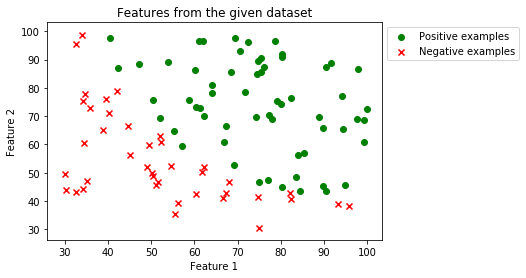

In [37]:
if __name__ == '__main__':
    main()